# 🤖 Perceptrón Simple en Python: Lógica AND con 4 entradas

📌 El objetivo es que la red aprenda el comportamiento de una compuerta lógica AND usando un conjunto de entradas de 4 bits (`X1`, `X2`, `X3`, `X4`) con su salida deseada `d`.

---

### 👷🏽‍♂️Integrantes
- Alfaro Urtecho Brayam Esmith
- Huamán Gonzáles Kevin Jhoel
- Infante Chacón Alexander
- Saldaña Vargas Witman Daniel

##  ¿Qué es un perceptrón?

Un perceptrón es una neurona artificial que realiza una suma ponderada de sus entradas y luego aplica una **función de activación**.

La fórmula de la salida neta (Z) es:

$$
Z = \sum_{i=1}^{n} x_i \cdot w_i + b
$$

Donde:

- $x_i$: entrada
- $w_i$: peso de la entrada
- $b_i$: sesgo (bias)

La salida final depende de aplicar una función de activación, como la función escalón:

$$
f(Z) =
\begin{cases}
1 & \text{si } Z \geq 0 \\
0 & \text{si } Z < 0
\end{cases}
$$


## Tabla de entrenamiento (compuerta AND con 4 entradas)

In [7]:
import pandas as pd

data = {
    "X1": [0, 0, 1, 1],
    "X2": [0, 1, 1, 1],
    "X3": [0, 1, 1, 0],
    "X4": [0, 0, 1, 1],
    "d":  [0, 0, 1, 0]
}

df = pd.DataFrame(data)
df

,X1,X2,X3,X4,d
0,0,0,0,0,0
1,0,1,1,0,0
2,1,1,1,1,1
3,1,1,0,1,0


## Código del Perceptron

In [8]:
import numpy as np

# Clase del perceptrón simple
class PerceptronSimple:
    def __init__(self, input_size, learning_rate , epochs ):
        # Inicializa pesos en cero (incluye bias como weights[0])
        self.weights = np.zeros(input_size + 1)
        self.lr = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        # Función escalón: activa si Z ≥ 0
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Calcula Z como suma ponderada + bias
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        return self.activation_function(z)

    def train(self, x, y):
        self.errors_por_epoca = []
        for epoch in range(self.epochs):
            print(f"Época {epoch +1}:")
            for xi, target in zip(x, y):
                output = self.predict(xi)
                error = target - output

                # Ajuste de pesos y bias
                self.weights[1:] += self.lr * error * xi
                self.weights[0] += self.lr * error

                print(f"  Entrada: {xi}, Esperado: {target}, Predicho: {output}, Error: {error}")
                # Error total por época (opcional: suma o promedio absoluto)
                error_epoca = sum(abs(target - self.predict(xi)) for xi, target in zip(x, y))

            self.errors_por_epoca.append(error_epoca)


## Diagrama de activación de neurona

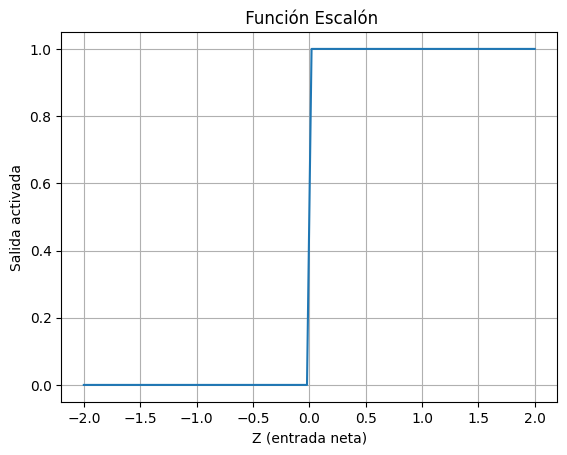

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 100)
y = [1 if val >= 0 else 0 for val in x]

plt.plot(x, y)
plt.title(" Función Escalón")
plt.xlabel("Z (entrada neta)")
plt.ylabel("Salida activada")
plt.grid(True)
plt.show()

## Entrenamiento

In [10]:
# Leer datos desde la tabla creada manualmente
X = df[["X1", "X2", "X3", "X4"]].values
Y = df["d"].values

# Crear y entrenar el perceptrón
perceptron = PerceptronSimple(input_size=4, learning_rate=0.001, epochs=15)
perceptron.train(X, Y)


Época 1:
  Entrada: [0 0 0 0], Esperado: 0, Predicho: 1, Error: -1
  Entrada: [0 1 1 0], Esperado: 0, Predicho: 0, Error: 0
  Entrada: [1 1 1 1], Esperado: 1, Predicho: 0, Error: 1
  Entrada: [1 1 0 1], Esperado: 0, Predicho: 1, Error: -1
Época 2:
  Entrada: [0 0 0 0], Esperado: 0, Predicho: 0, Error: 0
  Entrada: [0 1 1 0], Esperado: 0, Predicho: 1, Error: -1
  Entrada: [1 1 1 1], Esperado: 1, Predicho: 0, Error: 1
  Entrada: [1 1 0 1], Esperado: 0, Predicho: 1, Error: -1
Época 3:
  Entrada: [0 0 0 0], Esperado: 0, Predicho: 0, Error: 0
  Entrada: [0 1 1 0], Esperado: 0, Predicho: 0, Error: 0
  Entrada: [1 1 1 1], Esperado: 1, Predicho: 0, Error: 1
  Entrada: [1 1 0 1], Esperado: 0, Predicho: 1, Error: -1
Época 4:
  Entrada: [0 0 0 0], Esperado: 0, Predicho: 0, Error: 0
  Entrada: [0 1 1 0], Esperado: 0, Predicho: 0, Error: 0
  Entrada: [1 1 1 1], Esperado: 1, Predicho: 0, Error: 1
  Entrada: [1 1 0 1], Esperado: 0, Predicho: 1, Error: -1
Época 5:
  Entrada: [0 0 0 0], Esperado: 0, Pr

## Gráfico de errores

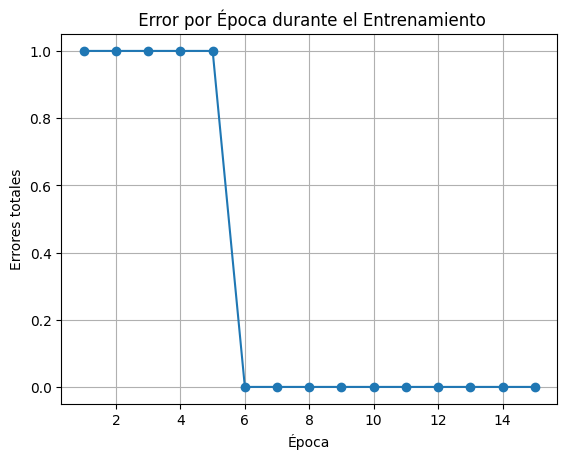

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(1, perceptron.epochs + 1), perceptron.errors_por_epoca, marker='o')
plt.title(' Error por Época durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Errores totales')
plt.grid(True)
plt.show()

## Pruebas Finales

In [12]:
print("\nPruebas finales:")
for xi in X:
    pred = perceptron.predict(xi)
    print(f"Entrada: {xi}, Predicción: {pred}")


Pruebas finales:
Entrada: [0 0 0 0], Predicción: 0
Entrada: [0 1 1 0], Predicción: 0
Entrada: [1 1 1 1], Predicción: 1
Entrada: [1 1 0 1], Predicción: 0


##  Conclusiones

- El perceptrón simple es capaz de aprender funciones lógicas **linealmente separables** como AND.
- El peso y el bias se ajustan usando el error en cada época.
- Si quisiéramos aprender XOR, necesitaríamos una red multicapa (MLP).
